# 使用说明书
此代码实现的功能如下：
+ 数据预处理：将Cal文件内数据读取并进行处理（注：需要完整记录基线、80、50，51，53，20，第二零点，若不完整需先进行补充）
+ 计算响应电阻、响应大小、区分度、响应稳定性、恢复程度、基线偏差
+ 从响应电阻、响应大小、区分度、响应稳定性、恢复程度、基线偏差对数据进行分组
+ 绘制响应电阻、响应大小、区分度 曲线图像
+ 筛选出满足6参数或是7参数的部件


```mermaid
操作流程
    [1]获取数据文件（cal、ETH（气体）.txt） 
    --> [2]查看数据情况
    --> [3]有无测试点丢失点 
      --> [4_1]有 --> [5]抓取数据，在Cal文件里补充 --> [6]
      --> [4_2]无 --> [6]
    [6]将Cal文件放到 data文件夹， 总数据文件（如ETH.txt）放到batch文件夹 
    --> [7]运行代码
    --> [8]在report文件夹查看报告
```


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import numpy as np
import os
import math
import seaborn as sns

In [2]:
scale = pd.read_csv("scale_file_CH4.csv").T
scale.index=["response_resistance_x","response_size_x","discrimination_x","selectivity_x"]
response_resistance_x=list(scale[scale.index=="response_resistance_x"].T["response_resistance_x"])
response_size_x=list(scale[scale.index=="response_size_x"].T["response_size_x"])
discrimination_x=list(scale[scale.index=="discrimination_x"].T["discrimination_x"])
selectivity_x=list(scale[scale.index=="selectivity_x"].T["selectivity_x"])

response_resistance_x=[x for x in response_resistance_x if not math.isnan(x)]
response_size_x=[x for x in response_size_x if not math.isnan(x)]
discrimination_x=[x for x in discrimination_x if not math.isnan(x)]
selectivity_x=[x for x in selectivity_x if not math.isnan(x)]


In [3]:
def get_filepaths(dir):
    filepaths = []
    for filename in os.listdir(dir):
        filepath = os.path.join(dir, filename)
        if os.path.isfile(filepath):
            filepaths.append(filepath)
    return filepaths
filtered_no=get_filepaths("data")
filtered_no

['data\\06-18 10-31-10 CH14BP3A11024CH4.txt',
 'data\\06-18 13-51-39 CH14BP3A21008CH4.txt',
 'data\\06-18 15-30-07 CH14BP3A3960CH4.txt']

In [4]:
path_="data/"+"06-18 15-30-07 CH14BP3A3960CH4.txt"#引号内填入上述要处理的文件名
data = pd.read_csv(path_,sep=r'\s+',names=[str(i) for i in range(2500)])
data=data.transpose().dropna(how="all",axis=0)
data = data[data.sum(axis=1) != 0][1:]
data.columns=["0","20","10","5","2","2000"]
batch_name=path_[20:-4]

In [5]:
response_resistance = data["10"]
response_size = data["0"]/data["10"]
discrimination = data["10"]/data["20"]
selectivity=(data["0"]/data["2"])-(data["0"]/data["2000"])

In [6]:
no_=data.index.values.astype(int)

data_processed = pd.concat(
        [pd.Series(no_,index=response_resistance.index),
        response_resistance,response_size,discrimination,selectivity
        ],axis=1)
columns=["序号","响应电阻",
    "响应大小",
    "区分度",
    "选择性",
    ]
data_processed.columns=columns

In [7]:
y_1=[0]+list(pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False,normalize=True).values)
y_2=[0]+list(pd.cut(response_size,bins=response_size_x).value_counts(sort=False,normalize=True).values)
y_3=[0]+list(pd.cut(discrimination,bins=discrimination_x).value_counts(sort=False,normalize=True).values)
y_4=[0]+list(pd.cut(selectivity,bins=selectivity_x).value_counts(sort=False,normalize=True)[1:].values)

x_1=response_resistance_x
x_2=response_size_x
x_3=discrimination_x
x_4=selectivity_x[1:]

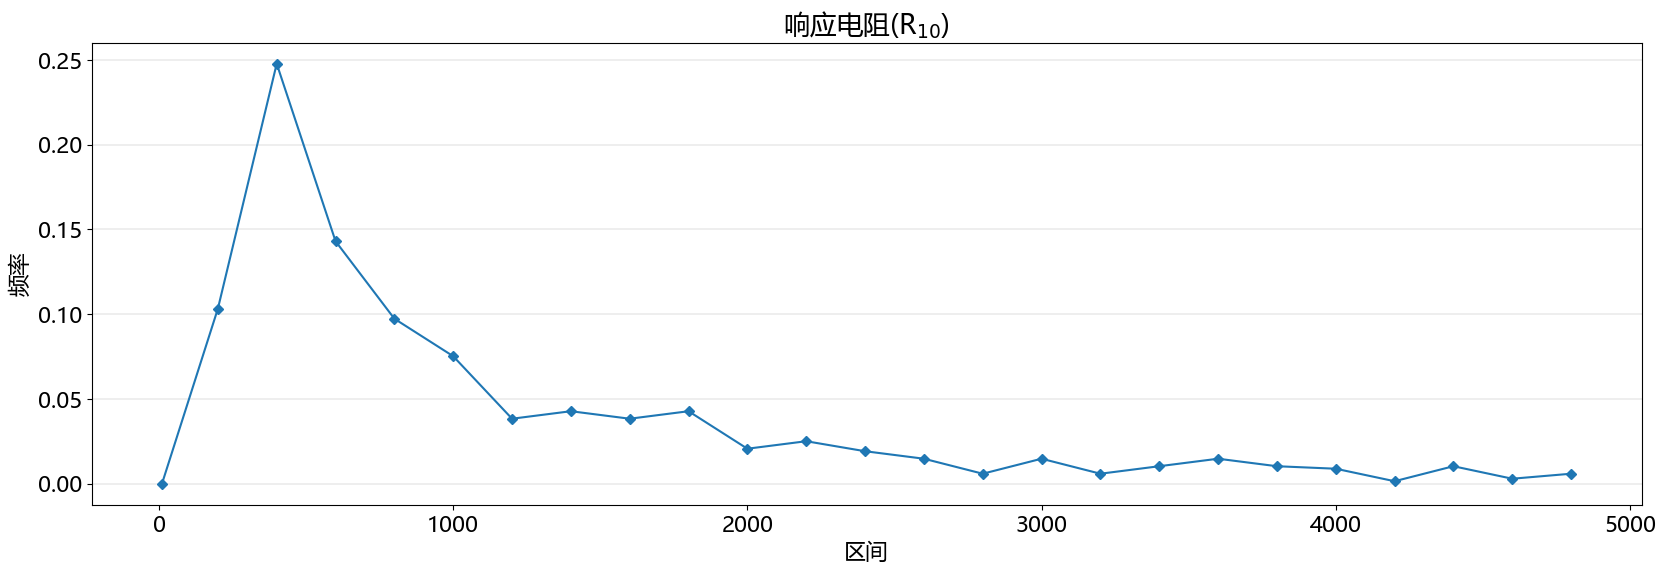

409600: 4


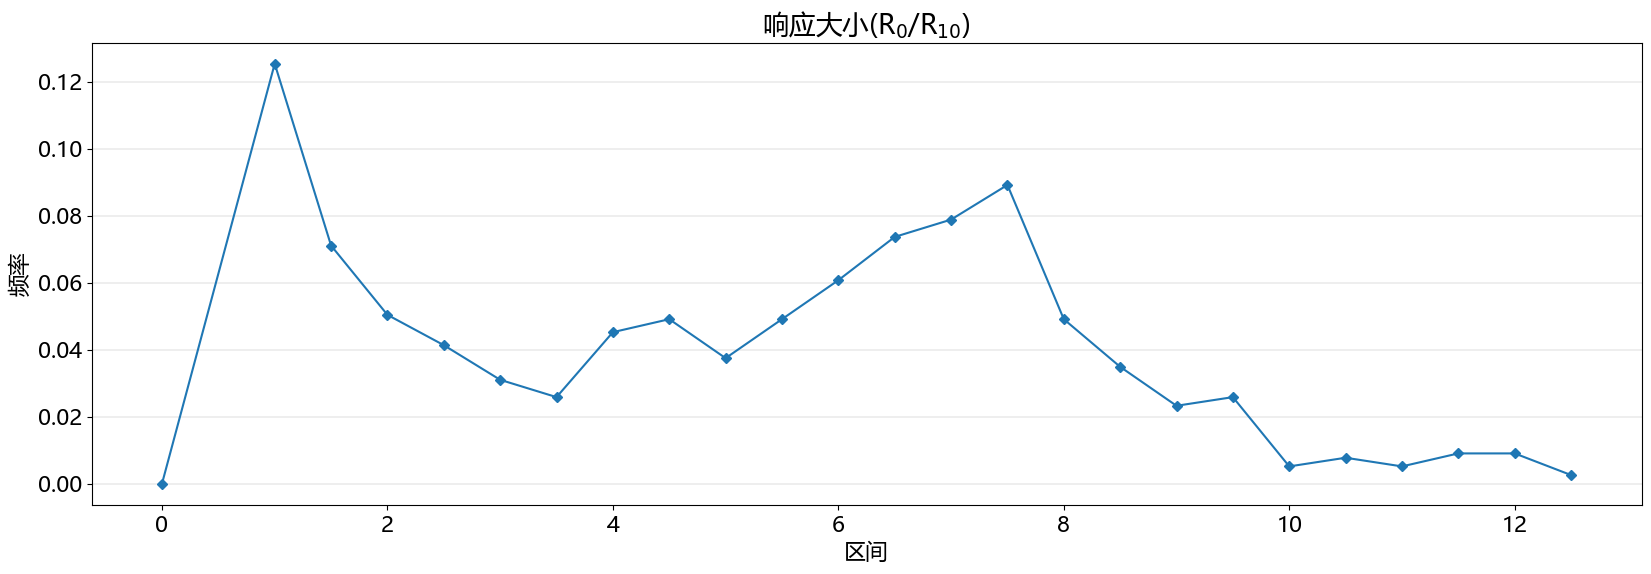

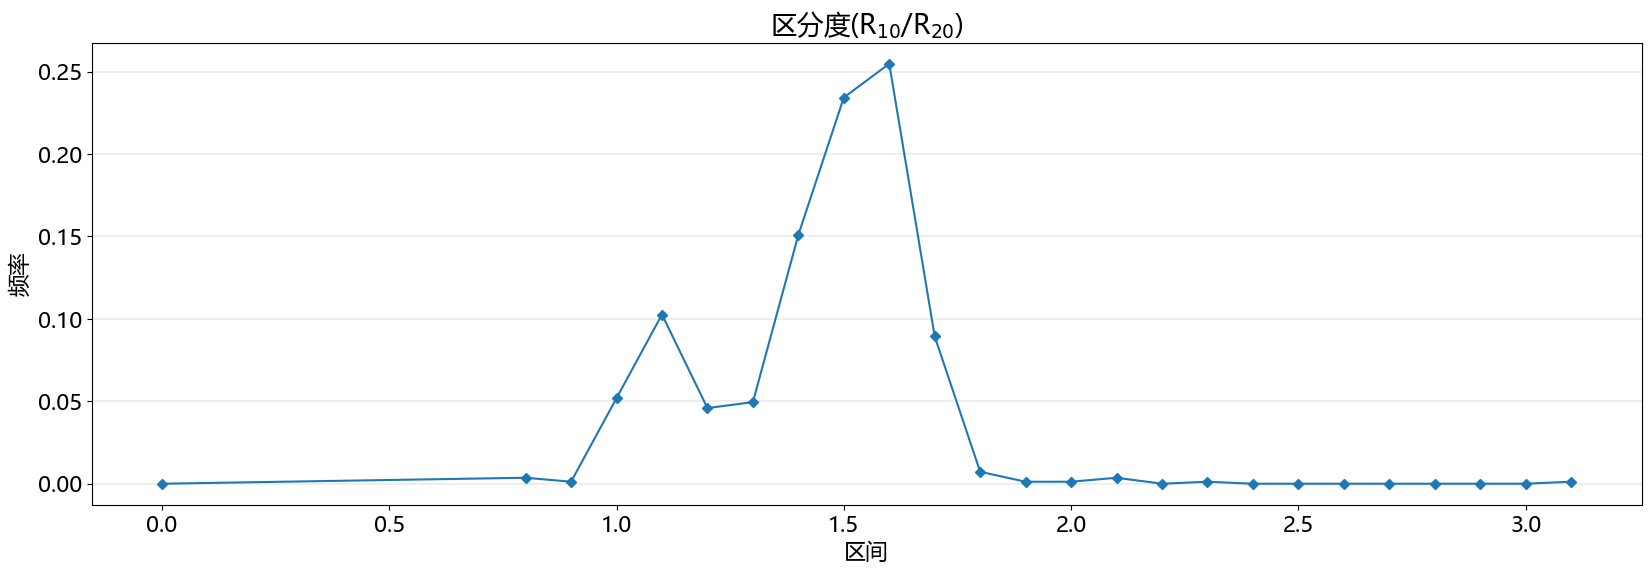

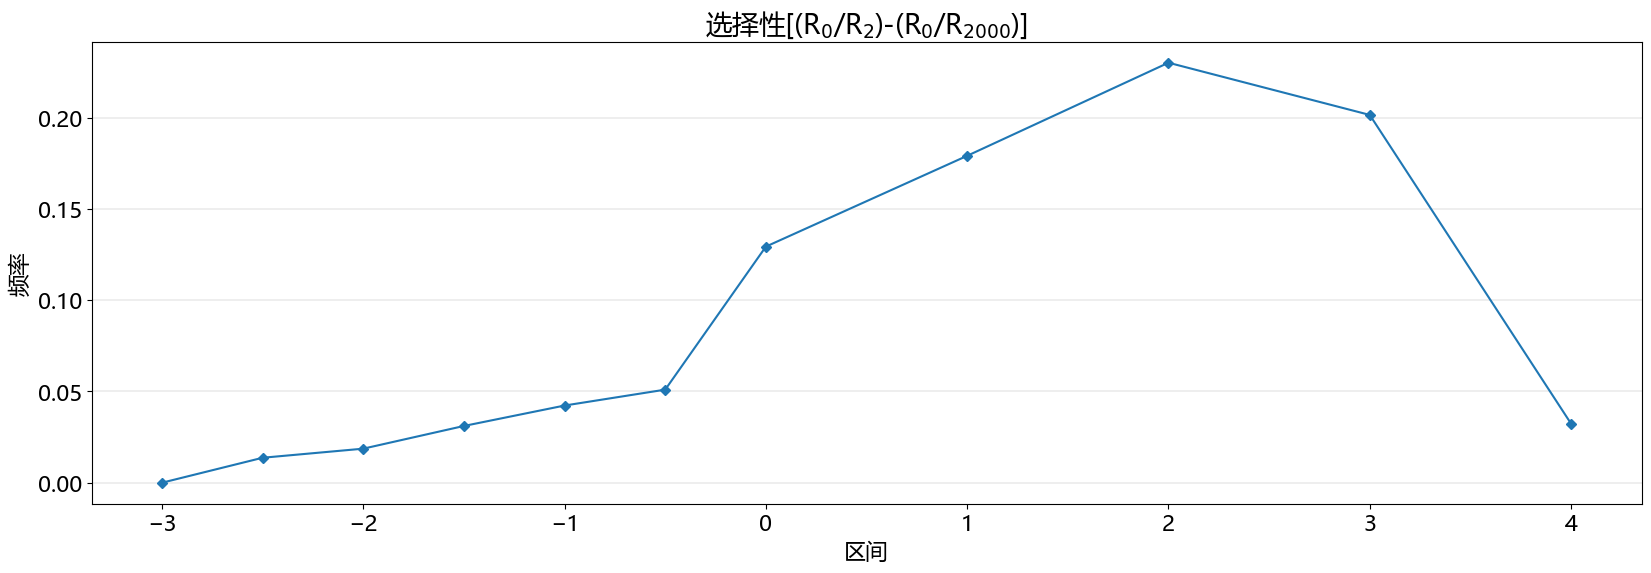

In [8]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams["font.size"] =16
plt.figure(figsize=(20, 6))
plt.title("响应电阻(R$_{10}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_1, y_1 ,marker='D', markersize=5)
plt.savefig('响应电阻.png')
plt.show()

print("409600:",pd.cut(response_resistance,bins=response_resistance_x).value_counts(sort=False).values[-1])

plt.figure(figsize=(20, 6))
plt.title("响应大小(R$_{0}$/R$_{10}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_2, y_2, marker='D', markersize=5)
plt.savefig('响应大小.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("区分度(R$_{10}$/R$_{20}$)")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_3, y_3, marker='D', markersize=5)
plt.savefig('区分度.png')
plt.show()

plt.figure(figsize=(20, 6))
plt.title("选择性[(R$_{0}$/R$_{2}$)-(R$_{0}$/R$_{2000}$)]")
plt.xlabel("区间")
plt.ylabel("频率")
plt.grid( axis='y', linewidth=0.3)
plt.plot(x_4, y_4, marker='D', markersize=5)
plt.savefig('选择性.png')
plt.show()



筛件

In [9]:
step_1=pd.merge(
    data_processed[data_processed["响应电阻"]>=10] , data_processed[data_processed["响应电阻"]<=1000],how="inner"
    )

step_2=step_1[step_1["响应大小"]>5]

step_3=step_2[step_2["区分度"]>1.2]
step_4=step_3[step_3["选择性"]>=0]


In [10]:
filtered_no=[]
step_4 = step_4.sort_values(by="序号")
for i in step_4["序号"]:
        if int(i)%64 == 0:
            filtered_no.append(str(int(i)//64-1)+"+"+str(64))
        else:  filtered_no.append(str(int(i)//64)+"+"+str(int(i)%64))
step_4["序号"]=filtered_no
step_4.to_excel("中(0~100)_processed_CH4.xlsx")

In [11]:
defective_products = []
defective_products.append(pd.merge(
    data_processed[data_processed["响应电阻"]>=10] , data_processed[data_processed["响应电阻"]<=1000],how="inner"
    ).__len__()/data_processed.__len__())
defective_products.append(data_processed[data_processed["响应大小"]>5].__len__()/data_processed.__len__())
defective_products.append(data_processed[data_processed["区分度"]>1.2].__len__()/data_processed.__len__())
defective_products.append(data_processed[data_processed["选择性"]>0].__len__()/data_processed.__len__())

生成报告

In [23]:
from docx import Document 
from docx.oxml.ns import qn
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.shared import Inches
from docx.shared import Cm
from docx.shared import Pt
from decimal import Decimal

document =Document()
document.styles['Normal'].font.name='楷体'
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), '楷体')
run=document.add_heading('',level=0).add_run('分析报告')
run.font.name='微软雅黑'
_title = document.styles['Title']
_title.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER
paragraph = document.add_paragraph('本次测试日期为'+path_[5:path_.find("C")]) 
paragraph.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY
paragraph = document.add_paragraph('本次测试批次为'+batch_name+'，一共测试'+str(data.__len__())+"个器件")

paragraph = document.add_paragraph('各参数筛选合格率') 
paragraph.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER 
table = document.add_table(rows=1, cols=2, style='Table Grid') 
table.style.paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
hdr_cells = table.rows[0].cells
hdr_cells[0].text = '指标名称'
hdr_cells[1].text = '值'
table.cell(0,0).width=Cm(5) 
table.cell(0,1).width=Cm(10) 

mlst =["响应电阻",
    "响应大小",
    "区分度",
    "选择性",
    ]

for i,_row in enumerate(mlst):
    row_cells = table.add_row().cells # 添一行表格元素
    row_cells[0].text = _row
    row_cells[1].text = ' '+str(round(Decimal(defective_products[i]),2)*100)[:5]+"%"
    p = row_cells[1].paragraphs[0]
    p.paragraph_format.alignment =WD_ALIGN_PARAGRAPH.JUSTIFY # 单元格文字两端对齐

paragraph = document.add_paragraph(' ')

paragraph = document.add_paragraph('参数筛选区间表') 
paragraph.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER 
table = document.add_table(rows=1, cols=2, style='Table Grid') 
table.style.paragraph_format.alignment=WD_ALIGN_PARAGRAPH.CENTER
hdr_cells = table.rows[0].cells
hdr_cells[0].text = '指标名称'
hdr_cells[1].text = '区间范围'
table.cell(0,0).width=Cm(5) 
table.cell(0,1).width=Cm(10) 

mlst =["响应电阻",
    "响应大小",
    "区分度",
    "选择性",
    ]
sc=["10-1000",">5",">1.2",">0",]

for i,_row in enumerate(mlst):
    row_cells = table.add_row().cells 
    row_cells[0].text = _row
    row_cells[1].text = ' '+sc[i]
    p = row_cells[1].paragraphs[0]
    p.paragraph_format.alignment =WD_ALIGN_PARAGRAPH.JUSTIFY 

paragraph = document.add_paragraph(' ')

paragraph = document.add_paragraph('其中符合4参数器件'+str(step_4.__len__())+"个器件"+"，良品率(占测试总数量)为"+str(round(Decimal(step_4.__len__()/data.__len__()),4)*100)[:5]+"%")
paragraph = document.add_paragraph('其中符合4参数器件:'+str(list(step_4["序号"])))

document.add_picture('响应电阻.png', width=Cm(15))
document.add_picture('响应大小.png', width=Cm(15))
document.add_picture('区分度.png', width=Cm(15))
document.add_picture('选择性.png', width=Cm(15))



document.save('report/分析报告_'+batch_name+'.docx')
